In [3]:
import pandas as pd
import gzip
from __future__ import division

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, PlaintextCorpusReader
#from nltk import FreqDist, collocations, wordpunct_tokenize, Text, pos_tag
import nltk
from nltk.collocations import *
from nltk.draw.dispersion import dispersion_plot

In [6]:
import os
THIS_DIR = os.path.join(os.getenv("HOME"), 'ipython-examples', 'reviews')

# Load review data

In [7]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')


In [8]:
# Download sample Amazon review data from: http://jmcauley.ucsd.edu/data/amazon/
# I downloaded only one category of review data, selecting a smallish set
df = getDF('/Users/cynthiasadler/Downloads/reviews_Musical_Instruments_5.json.gz')

In [9]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [10]:
df['fulltext'] = df.summary + ' ' + df.reviewText

In [11]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,fulltext
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014","good Not much to write about here, but it does..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",Jake The product does exactly as it should and...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",It Does The Job Well The primary job of this d...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",No more pops when I record my vocals. This pop...


# Basic exploration of review data

In [12]:
# overall sentiment distribution
df.overall.value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

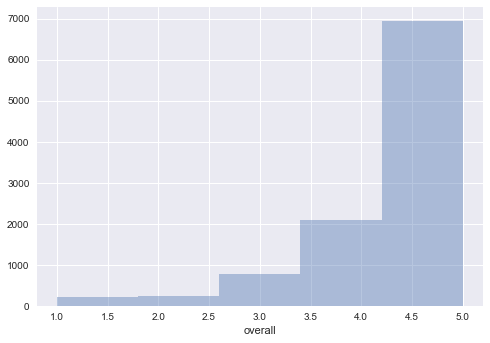

In [13]:
sns.distplot(df.overall, bins=5, kde=False)

In [14]:
# number of reviews
len(df)

10261

In [15]:
# number of unique products
len(df.asin.unique())

900

In [16]:
df['helpfulness_ratio'] = df.helpful.apply(lambda x: x[0] / x[1] if x[1] != 0 else 0)

In [17]:
df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,fulltext,helpfulness_ratio
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014","good Not much to write about here, but it does...",0.000000
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",Jake The product does exactly as it should and...,0.928571
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",It Does The Job Well The primary job of this d...,1.000000
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...,0.000000
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",No more pops when I record my vocals. This pop...,0.000000


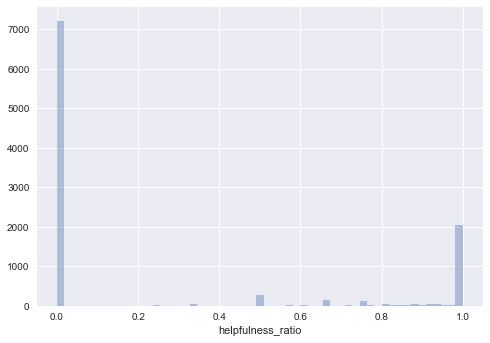

In [18]:
sns.distplot(df.helpfulness_ratio, bins=55, kde=False)

# NLTK - let's detour for some basics


## load data

In [19]:
# you can load a list of files.... we only happen to have one file,
# which I retrieved from https://www.cs.cmu.edu/~spok/grimmtmp/001.txt
grimm_reader = PlaintextCorpusReader(THIS_DIR, '.*\.txt')
grimm_reader

<PlaintextCorpusReader in '/Users/cynthiasadler/ipython-examples/reviews'>

In [20]:
grimm_reader.fileids()

['grimm01.txt']

In [21]:
# tokenize one corpus to list of words
grimm_tokens = grimm_reader.words('grimm01.txt')
grimm_tokens

['In', 'olden', 'times', 'when', 'wishing', 'still', ...]

In [22]:
# instantiate Text so we can use nltk power
grimm_text = nltk.Text(word.lower() for word in grimm_tokens)
grimm_text

<Text: in olden times when wishing still helped one...>

## nltk library goodies

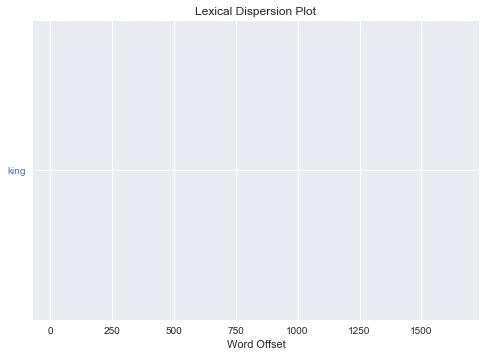

In [23]:
# this is blank plot for some reason... bummer.
grimm_text.dispersion_plot(['king'])

In [24]:
# get the contexts of a given word
grimm_text.concordance('king')

Displaying 17 of 17 matches:
                                     king whose daughters were all beautiful ,
 it shone in her face . close by the king ' s castle lay a great dark forest ,
and when the day was very warm , the king ' s child went out into the forest a
rolled straight into the water . the king ' s daughter followed it with her ey
eone said to her , " what ails you , king ' s daughter ? you weep so that even
th , and threw it on the grass . the king ' s daughter was delighted to see he
had seated herself at table with the king and all the courtiers , and was eati
ain , and was quite frightened . the king saw plainly that her heart was beati
pen the door for me ." then said the king , " that which you have promised mus
u ." she delayed , until at last the king commanded her to do it . once the fr
both lie down and go to sleep ." the king ' s daughter began to cry , for she 
 pretty , clean little bed . but the king grew angry and said , " he who helpe
en he fell down he was 

In [25]:
grimm_text.concordance('princess')

Displaying 7 of 7 matches:
 happened that on one occasion the princess ' s golden ball did not fall into 
 knocked at the door and cried , " princess , youngest princess , open the doo
 and cried , " princess , youngest princess , open the door for me ." she ran 
cked a second time , and cried , " princess , youngest princess , open the doo
 and cried , " princess , youngest princess , open the door for me , do you no
y by the cool waters of the well . princess , youngest princess , open the doo
 of the well . princess , youngest princess , open the door for me ." then sai


In [26]:
# find common contexts of two words
# these both have contexts of "the <word>'s"
# e.g., "the king's" and "the princess's"
grimm_text.common_contexts(['king', 'princess'])

the_'


In [27]:
# you might not find any common contexts, though
grimm_text.common_contexts(['king', 'waters'])

No common contexts were found


In [28]:
# find words with similar contexts
# in other words, for a given a word w, finds all contexts w1 w w2, 
# then finds all words w' that appear in the same context, i.e. w1 w' w2.
grimm_text.similar('king')

door forest well princess water frog table courtiers top


In [29]:
grimm_text.common_contexts(['forest', 'king'])

the_and


In [30]:
grimm_text.common_contexts(['water', 'king'])

the_and


In [31]:
grimm_text.common_contexts(['courtiers', 'king'])

the_,


In [32]:
# find collocations of two words
grimm_text.collocations()

faithful henry; golden ball; golden plate; splish splash; youngest
princess; golden crown; little golden; young king; little bed


In [33]:
grimm_text.concordance('faithful')

Displaying 4 of 4 matches:
d stood the young king ' s servant faithful henry . faithful henry had been so
 king ' s servant faithful henry . faithful henry had been so unhappy when his
 the young king into his kingdom . faithful henry helped them both in , and pl
h were springing from the heart of faithful henry because his master was set f


In [34]:
# create a Frequency Distribution, FreqDist, which is like Python Counter
fd = nltk.FreqDist(grimm_text)
type(fd)

nltk.probability.FreqDist

In [35]:
fd

FreqDist({'"': 29,
          "'": 13,
          ',': 135,
          ',"': 7,
          '-': 5,
          '.': 38,
          '."': 19,
          ';': 1,
          '?': 2,
          '?"': 3,
          'a': 20,
          'able': 1,
          'afraid': 2,
          'after': 1,
          'afterwards': 1,
          'again': 10,
          'against': 1,
          'ah': 3,
          'ails': 1,
          'all': 5,
          'almost': 1,
          'am': 5,
          'an': 1,
          'and': 75,
          'angry': 2,
          'answered': 2,
          'any': 1,
          'are': 1,
          'as': 8,
          'astonished': 1,
          'at': 7,
          'ate': 1,
          'avail': 1,
          'away': 2,
          'awoke': 1,
          'back': 2,
          'ball': 8,
          'band': 1,
          'bands': 2,
          'be': 11,
          'beating': 1,
          'beautiful': 3,
          'because': 4,
          'bed': 4,
          'been': 2,
          'began': 2,
          'behind': 3,
        

In [36]:
# most frequent word
fd.max()

','

In [37]:
# number of samples (or keys) with a given outcome or occurence
fd.Nr(29)

2

In [38]:
fd['"']

29

In [39]:
# find frequency of 'king'
fd.freq('king')

0.010083036773428233

In [40]:
# which is same as (number of occurences) / (number of words)
fd['king'] / len(grimm_text)

0.010083036773428233

In [41]:
# hapaxes are words that only occur once
fd.hapaxes()[:10]

['olden',
 'times',
 'wishing',
 'still',
 'lived',
 'whose',
 'daughters',
 'itself',
 'much',
 'astonished']

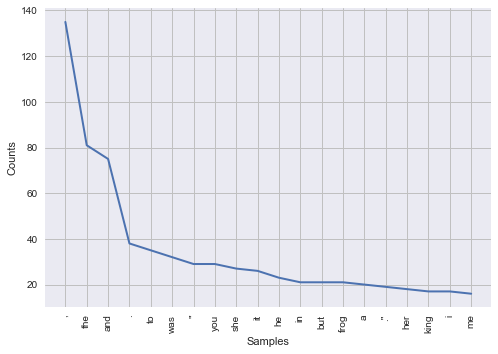

In [42]:
# a plot that actually works
fd.plot(20)

In [43]:
# check if 'king' looks about right in the plot
grimm_text.count('king')

17

In [44]:
# find words that commonly co-occur
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(grimm_tokens)

In [45]:
# bigram collocations measured with Pointwise Mutual Information
# see: https://en.wikipedia.org/wiki/Pointwise_mutual_information
finder.nbest(bigram_measures.pmi, 10)

[('Oh', 'yes'),
 ('almost', 'every'),
 ('any', 'human'),
 ('astonished', 'whenever'),
 ('beating', 'violently'),
 ('castle', 'lay'),
 ('caused', 'three'),
 ('every', 'mouthful'),
 ('forth', 'its'),
 ('ground', 'beyond')]

# Apply these ideas to our review data

In [46]:
# split reviews into two sets, positive (4 and 5 stars) and negative (1 and 2 stars)
positive_reviews = df[df.overall>3]
negative_reviews = df[df.overall<3]

In [47]:
# we will later filter out common english words
stopwords_en = stopwords.words('english')
stopwords_en[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

In [48]:
# let's make a function for text cleaning and tokenizing
def process_text(df):
    words=[]
    for item in positive_reviews.fulltext.iteritems():
        text = item[1]
        text = text.replace('"', '')
        item_words = word_tokenize(text)
        words.extend(item_words)
    
    # remove single character words, mostly punctuation
    words = [word for word in words if len(word) > 1]
    
    # remove numbers
    words = [word for word in words if not word.isnumeric()]
    
    # lower case everything
    words = [word.lower() for word in words]
    
    # remove stopwords
    words = [word for word in words if word not in stopwords_en]
    
    return words

## Positive reviews

In [49]:
len(positive_reviews)

9022

In [50]:
positive_words = process_text(positive_reviews)

In [51]:
len(positive_words)

437354

In [52]:
positive_words[0:10]

['good',
 'much',
 'write',
 'exactly',
 "'s",
 'supposed',
 'filters',
 'pop',
 'sounds',
 'recordings']

In [53]:
# calculate word frequencies
fd_pos = nltk.FreqDist(positive_words)

In [54]:
for word, frequency in fd_pos.most_common(30):
    print('{0}: {1}'.format(word, frequency))

great: 5623
guitar: 5333
's: 5273
n't: 5184
good: 4295
one: 3889
like: 3483
strings: 3391
use: 3364
sound: 3283
well: 2954
pedal: 2431
price: 2405
...: 2352
get: 2239
works: 2141
would: 2109
nice: 2046
little: 1999
really: 1995
amp: 1913
've: 1866
quality: 1751
much: 1699
used: 1563
also: 1516
easy: 1494
better: 1453
tone: 1410
strap: 1391


In [55]:
# get the top 30 most common
w, f = zip(*fd_pos.most_common(30))
w

('great',
 'guitar',
 "'s",
 "n't",
 'good',
 'one',
 'like',
 'strings',
 'use',
 'sound',
 'well',
 'pedal',
 'price',
 '...',
 'get',
 'works',
 'would',
 'nice',
 'little',
 'really',
 'amp',
 "'ve",
 'quality',
 'much',
 'used',
 'also',
 'easy',
 'better',
 'tone',
 'strap')

In [56]:
# we can tag parts of speech (POS)
# run this command to see help for POS: nltk.help.upenn_tagset()
# or refer to: http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
positive_tagged = nltk.pos_tag(w)
positive_tagged

[('great', 'JJ'),
 ('guitar', 'NN'),
 ("'s", 'POS'),
 ("n't", 'RB'),
 ('good', 'JJ'),
 ('one', 'CD'),
 ('like', 'IN'),
 ('strings', 'NNS'),
 ('use', 'VBP'),
 ('sound', 'JJ'),
 ('well', 'RB'),
 ('pedal', 'JJ'),
 ('price', 'NN'),
 ('...', ':'),
 ('get', 'NN'),
 ('works', 'NNS'),
 ('would', 'MD'),
 ('nice', 'RB'),
 ('little', 'JJ'),
 ('really', 'RB'),
 ('amp', 'JJ'),
 ("'ve", 'VBP'),
 ('quality', 'NN'),
 ('much', 'RB'),
 ('used', 'VBN'),
 ('also', 'RB'),
 ('easy', 'JJ'),
 ('better', 'JJR'),
 ('tone', 'NN'),
 ('strap', 'NN')]

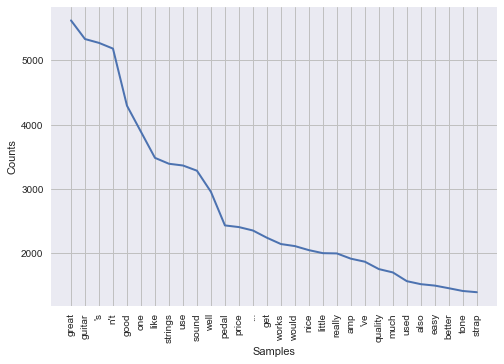

In [57]:
fd_pos.plot(30)

In [58]:
positive_text = nltk.Text(word.lower() for word in positive_words)
positive_text[0:10]

['good',
 'much',
 'write',
 'exactly',
 "'s",
 'supposed',
 'filters',
 'pop',
 'sounds',
 'recordings']

In [60]:
positive_text.concordance('pedal')

Displaying 25 of 2431 matches:
ely 's change tone sound connect one pedal another fine..i 'm going make one sm
et waves cables gave plenty room one pedal another used hosa cable emergency ba
net waves cables anything else great pedal cable connectors need cables connect
 small cheap could ask great durable pedal cable bought hosa pedal cable son in
reat durable pedal cable bought hosa pedal cable son interconnect guitar pedal 
 pedal cable son interconnect guitar pedal works well seems durable n't given p
 fix experience durable people using pedal board 's lot movement wear works fin
e works fine great little spaces one pedal another 's distance better use anoth
es working order matter best tremolo pedal money actually replaced boss tr2 ped
dal money actually replaced boss tr2 pedal everything supposed without perceive
 perceived explain good sounds since pedal rehoused metal enclosure better swit
end day 'm looking good sound pretty pedal board pedal seems solid enough n't t
ooking go

In [61]:
original_fulltext = []
for item in positive_reviews.fulltext.iteritems():
    text = item[1]
    item_words = word_tokenize(text)
    original_fulltext.extend(item_words)
orig_text = nltk.Text(word.lower() for word in original_fulltext)
orig_text.concordance('pedal')

Displaying 25 of 2431 matches:
r tone or sound and they connect one pedal to another just fine..i 'm only goin
bles gave me plenty of room from one pedal to another . i only used the hosa ca
es cables over anything else . great pedal cable connectors ! if you need some 
 could you ask for ? ! great durable pedal cable bought this hosa pedal cable f
durable pedal cable bought this hosa pedal cable for our son to interconnect hi
r our son to interconnect his guitar pedal . it works well and seems to be dura
e . most people are using these on a pedal board so there 's not a lot of movem
 great for little spaces between one pedal to another , if there 's more distan
 order no matter what . best tremolo pedal for the money i actually replaced a 
tually replaced a boss tr2 with this pedal . does everything it is supposed to 
d this sounds ? i have since had the pedal rehoused in a metal enclosure with a
king for a good sound , not a pretty pedal board . the pedal seems solid enough
und , not